<a href="https://colab.research.google.com/github/rajpatil7322/CNNPROJECTS/blob/master/ASL_aplhabet_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
np.random.seed(1000)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
import os
import zipfile
from pathlib import Path

In [ ]:
Path('/content/sample_data').mkdir(parents=True,exist_ok=True)

local_zip='/content/drive/My Drive/asl-alphabet (2).zip'

zip_ref=zipfile.ZipFile(local_zip,'r')

zip_ref.extractall('/content/sample_data')
zip_ref.close()

In [ ]:
import numpy as np
import pandas as pd
import os
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train_dir = '/content/sample_data/asl_alphabet_train/asl_alphabet_train'
test_dir = '/content/sample_data/asl_alphabet_test/asl_alphabet_test'

unique_labels =  ['F', 'S', 'H', 'I', 'E', 'B', 'N', 'Q', 'space', 'J', 'O', 'T', 'nothing', 'C', 'X', 'del', 'D', 'Y', 'Z', 'M', 'P', 'R', 'V', 'A', 'G', 'W', 'U', 'L', 'K']


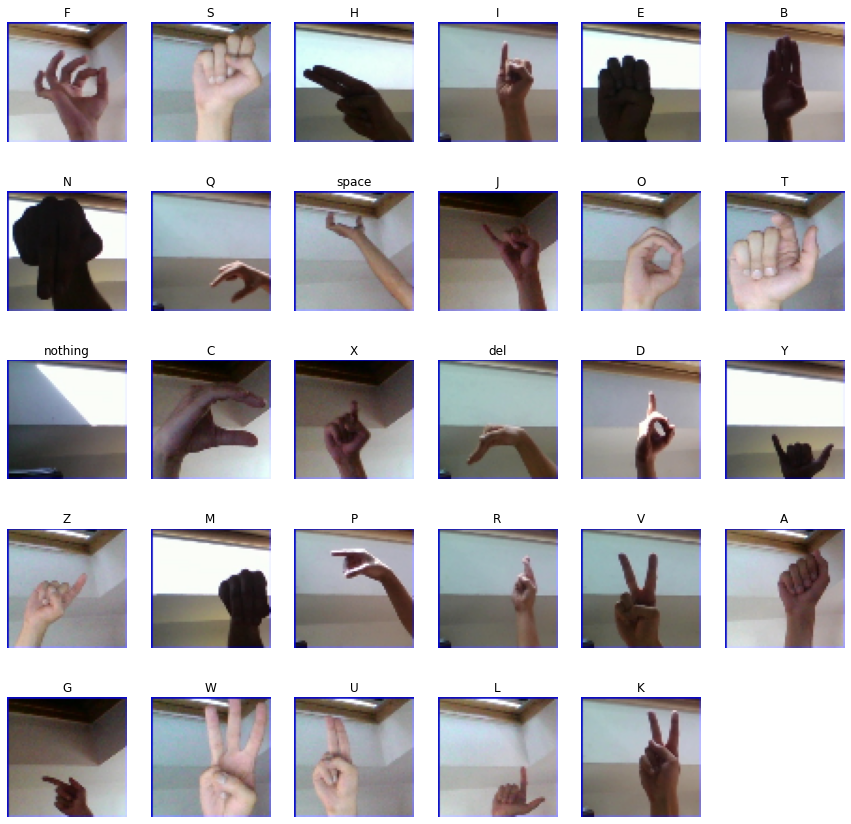

In [ ]:
def load_unique():
    size_img = 64,64 
    images_for_plot = []
    labels_for_plot = []
    for folder in os.listdir(train_dir):
        for file in os.listdir(train_dir + '/' + folder):
            filepath = train_dir + '/' + folder + '/' + file
            image = cv2.imread(filepath)
            final_img = cv2.resize(image, size_img)
            final_img = cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB)
            images_for_plot.append(final_img)
            labels_for_plot.append(folder)
            break
    return images_for_plot, labels_for_plot

images_for_plot, labels_for_plot = load_unique()
print("unique_labels = ", labels_for_plot)
fig = plt.figure(figsize = (15,15))
def plot_images(fig, image, label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    plt.title(label)
    return

image_index = 0
row = 5
col = 6
for i in range(1,(row*col)):
    plot_images(fig, images_for_plot[image_index], labels_for_plot[image_index], row, col, i)
    image_index = image_index + 1
plt.show()

In [ ]:
labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,
                   'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,
                   'Z':25,'space':26,'del':27,'nothing':28}
def load_data():
    """
    Loads data and preprocess. Returns train and test data along with labels.
    """
    images = []
    labels = []
    size = 64,64
    print("LOADING DATA FROM : ",end = "")
    for folder in os.listdir(train_dir):
        print(folder, end = ' | ')
        for image in os.listdir(train_dir + "/" + folder):
            temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            images.append(temp_img)
            labels.append(labels_dict[folder])
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    
    labels = keras.utils.to_categorical(labels)
    
    X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.05)

    print()
    print('Loaded', len(X_train),'images for training,','Train data shape =',X_train.shape)
    print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)
    
    return X_train, X_test, Y_train, Y_test
  

In [ ]:
X_train, X_test, Y_train, Y_test = load_data()

LOADING DATA FROM : F | S | H | I | E | B | N | Q | space | J | O | T | nothing | C | X | del | D | Y | Z | M | P | R | V | A | G | W | U | L | K | 
Loaded 82650 images for training, Train data shape = (82650, 64, 64, 3)
Loaded 4350 images for testing Test data shape = (4350, 64, 64, 3)


In [ ]:
Y_train.shape

(82650, 29)

In [ ]:
    model = Sequential()
    
    model.add(Conv2D(16, kernel_size = [3,3], padding = 'same', activation = 'relu', input_shape = (64,64,3)))
    model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(128, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(512, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
    model.add(Dense(29, activation = 'softmax'))
    
    model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ["accuracy"])
    
    print("MODEL CREATED")
    model.summary()

MODEL CREATED
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7

In [ ]:
 model.fit(X_train, Y_train, batch_size = 64, epochs = 5, validation_split = 0.1)

Train on 74385 samples, validate on 8265 samples
Epoch 1/5
74385/74385 [==============================] - 48s 648us/step - loss: 0.8492 - accuracy: 0.8259 - val_loss: 0.2740 - val_accuracy: 0.9679
Epoch 2/5
74385/74385 [==============================] - 41s 549us/step - loss: 0.2084 - accuracy: 0.9748 - val_loss: 0.1953 - val_accuracy: 0.9734
Epoch 3/5
74385/74385 [==============================] - 41s 550us/step - loss: 0.1632 - accuracy: 0.9818 - val_loss: 0.1178 - val_accuracy: 0.9965
Epoch 4/5
74385/74385 [==============================] - 41s 551us/step - loss: 0.1641 - accuracy: 0.9832 - val_loss: 0.1434 - val_accuracy: 0.9889
Epoch 5/5
74385/74385 [==============================] - 41s 552us/step - loss: 0.1391 - accuracy: 0.9876 - val_loss: 0.1368 - val_accuracy: 0.9887


In [ ]:
pd.DataFrame(model.history.history)

,val_loss,val_accuracy,loss,accuracy
0,0.273991,0.967937,0.849171,0.825919
1,0.195328,0.973382,0.208351,0.974820
2,0.117785,0.996491,0.163173,0.981771
3,0.143407,0.988869,0.164060,0.983236
4,0.136814,0.988748,0.139082,0.987618


In [ ]:
evaluate_metrics = model.evaluate(X_test, Y_test)
print("\nEvaluation Accuracy = ", "{:.2f}%".format(evaluate_metrics[1]*100),"\nEvaluation loss = " ,"{:.6f}".format(evaluate_metrics[0]))


4350/4350 [==============================] - 1s 307us/step

Evaluation Accuracy =  98.69% 
Evaluation loss =  0.138746


In [ ]:
os.listdir('/content/sample_data/asl_alphabet_test/asl_alphabet_test')


['Z_test.jpg',
 'F_test.jpg',
 'W_test.jpg',
 'I_test.jpg',
 'R_test.jpg',
 'G_test.jpg',
 'C_test.jpg',
 'space_test.jpg',
 'U_test.jpg',
 'O_test.jpg',
 'S_test.jpg',
 'H_test.jpg',
 'D_test.jpg',
 'T_test.jpg',
 'V_test.jpg',
 'nothing_test.jpg',
 'X_test.jpg',
 'M_test.jpg',
 'Y_test.jpg',
 'P_test.jpg',
 'J_test.jpg',
 'A_test.jpg',
 'K_test.jpg',
 'N_test.jpg',
 'B_test.jpg',
 'L_test.jpg',
 'E_test.jpg',
 'Q_test.jpg']

In [ ]:
test_image_dir='/content/sample_data/asl_alphabet_test/asl_alphabet_test'

In [ ]:
test_image=test_image_dir+'/Q_test.jpg'


In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
image_shape=(64,64,3)
my_image = image.load_img(test_image,target_size=image_shape)

In [ ]:
type(my_image)

PIL.Image.Image

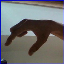

In [ ]:
my_image

In [ ]:
my_image = image.img_to_array(my_image)
type(my_image)
my_image.shape

(64, 64, 3)

In [ ]:
my_image = np.expand_dims(my_image, axis=0)

In [ ]:
my_image.shape

(1, 64, 64, 3)

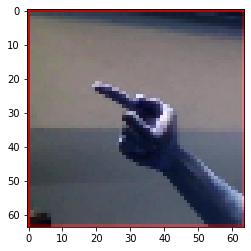

In [ ]:
from matplotlib.image import imread
plt.imshow(X_test[50])

In [ ]:
raj=X_test[50]
raj.shape

(64, 64, 3)

In [ ]:
type(raj)

numpy.ndarray

In [ ]:
raj=np.expand_dims(raj,axis=0)
raj.shape

(1, 64, 64, 3)

In [ ]:
prediction=model.predict_classes(raj)
pd.DataFrame(prediction).transpose()

,0
0,6
